In [1]:
import pandas as pd       #Se usa para el manejo de los DataFrame
import numpy as np        #Se usa para el manejo de las estructuras de datos (Array, Listas, Tuplas, Diccionarios)
import matplotlib.pyplot as plt #Se usa para crear las graficas.
import plotly.express as px
import matplotlib as mpl
#------------------------------------#
from scipy.stats import zscore
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

#-------------------------------------#
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("01 - Salidas/DSFormato.xlsx")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,MPG,CYLINDERS,DESPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN,CAR NAME
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


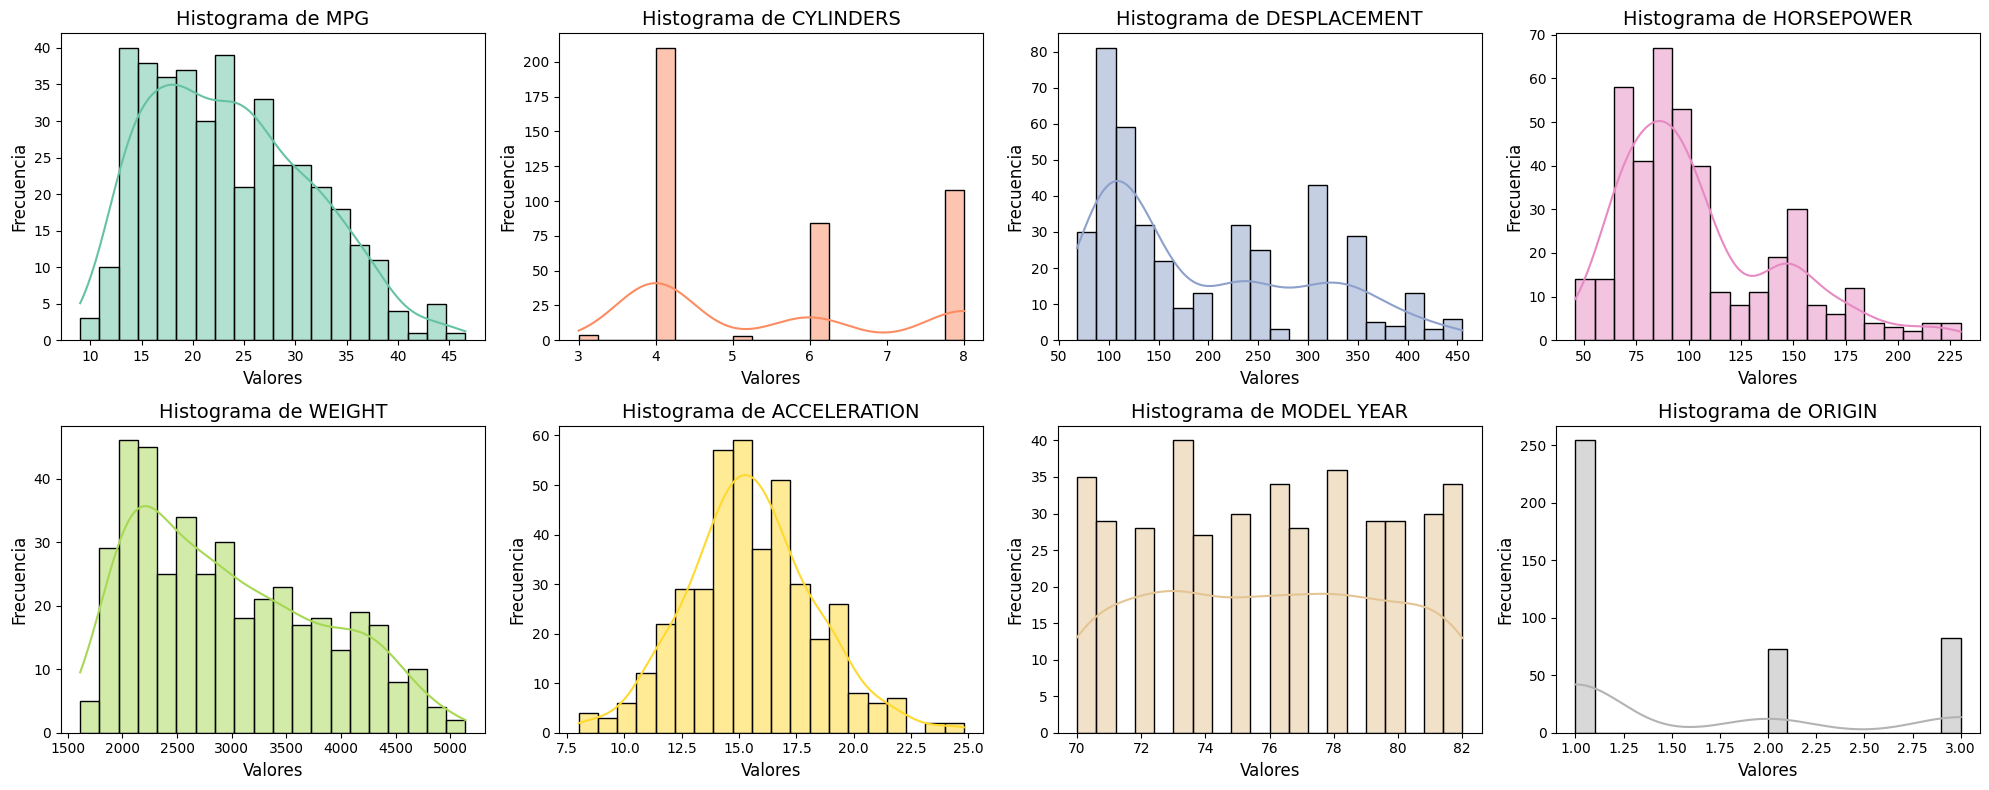

In [3]:
#Filtrar las columnas numericas
df_numerico = df.select_dtypes(include='number')

#Configurar tamano de los graficos
num_vars = len(df_numerico.columns)
cols = 4
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(20, rows * 4))

#Usar una paleta de colores
paleta = sns.color_palette("Set2", num_vars)

#Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_numerico[columna].dropna(), kde=True, color=paleta[i-1], bins=20)
    plt.title(f'Histograma de {columna}', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

#Ajusto espacio y muestro grafico
plt.tight_layout()
plt.show()

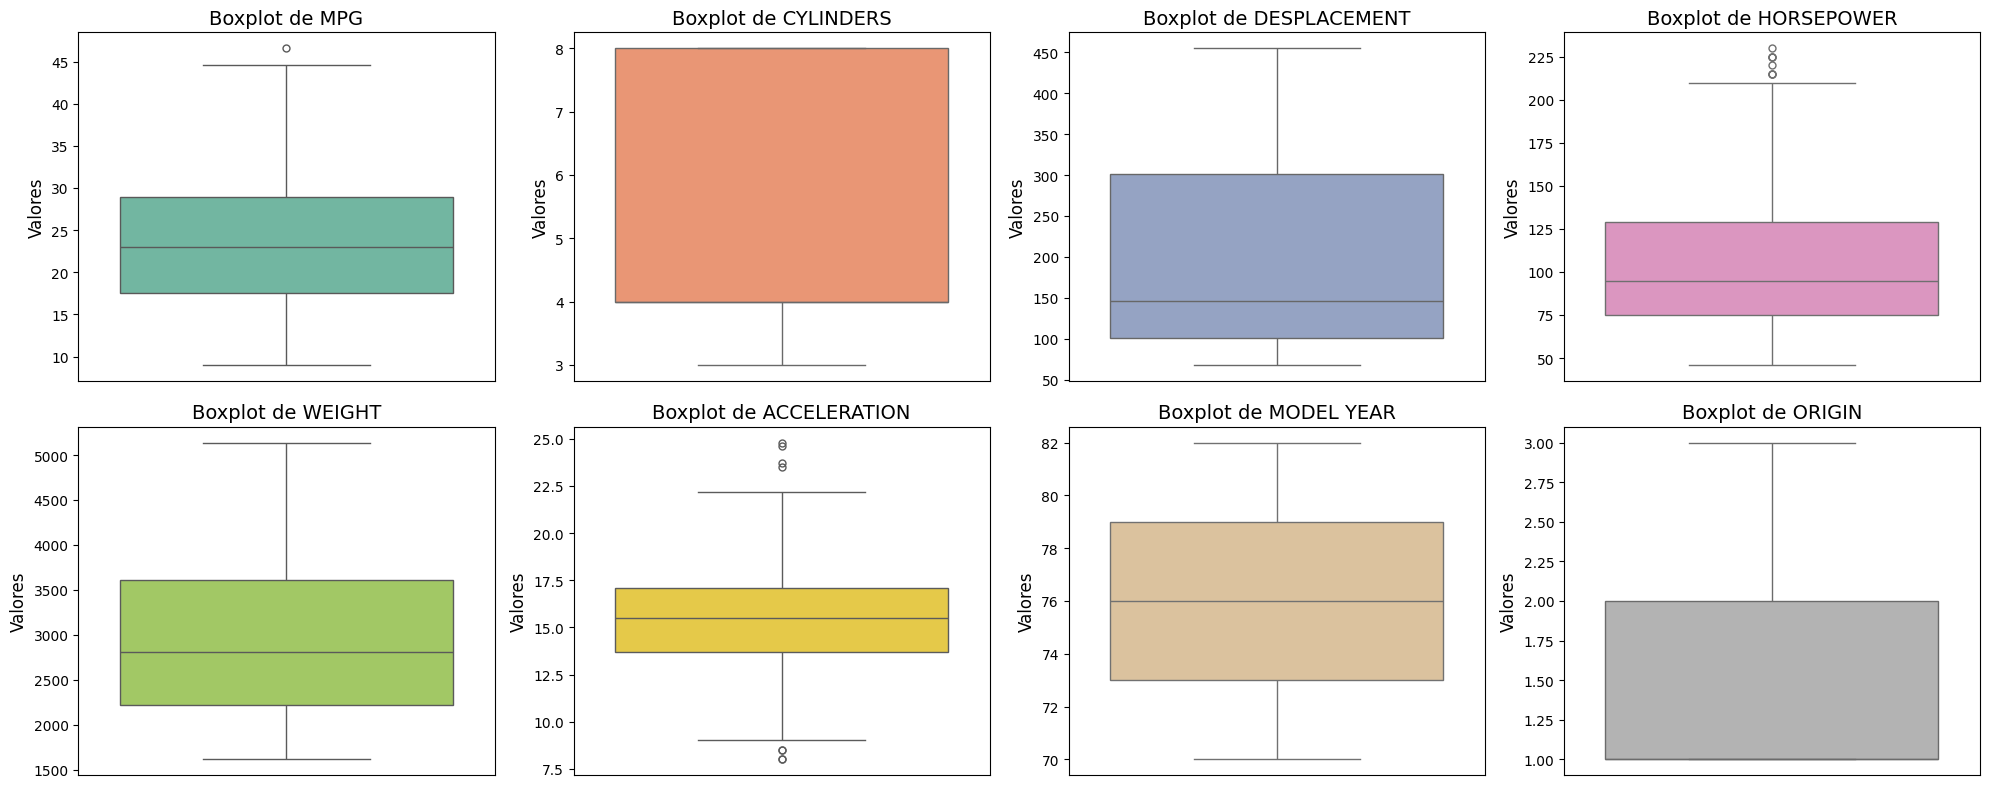

In [4]:
#Filtrar las columnas numericas
df_numerico = df.select_dtypes(include='number')

#Configurar tamano de los graficos
num_vars = len(df_numerico.columns)
cols = 4
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(20, rows * 4))

#Usar una paleta de colores
paleta = sns.color_palette("Set2", num_vars)

#Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df_numerico[columna], color=paleta[i-1], fliersize=5)
    plt.title(f'Boxplot de {columna}', fontsize=14)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks([])

#Ajusto espacio y muestro grafico
plt.tight_layout()
plt.show()

In [5]:
def OutlierIQR(df, column):
    # Calcular Q25 y Q75
    seventy_fifth = df[column].quantile(0.75)
    twenty_fifth = df[column].quantile(0.25)

    # Calcular el IQR
    iqr = seventy_fifth - twenty_fifth

    # Calcular los límites (superior e inferior)
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)

    # Filtrar los outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]

    return filtered_df

df = OutlierIQR(df, 'MPG')
df = OutlierIQR(df, 'HORSEPOWER')
df = OutlierIQR(df, 'ACCELERATION')


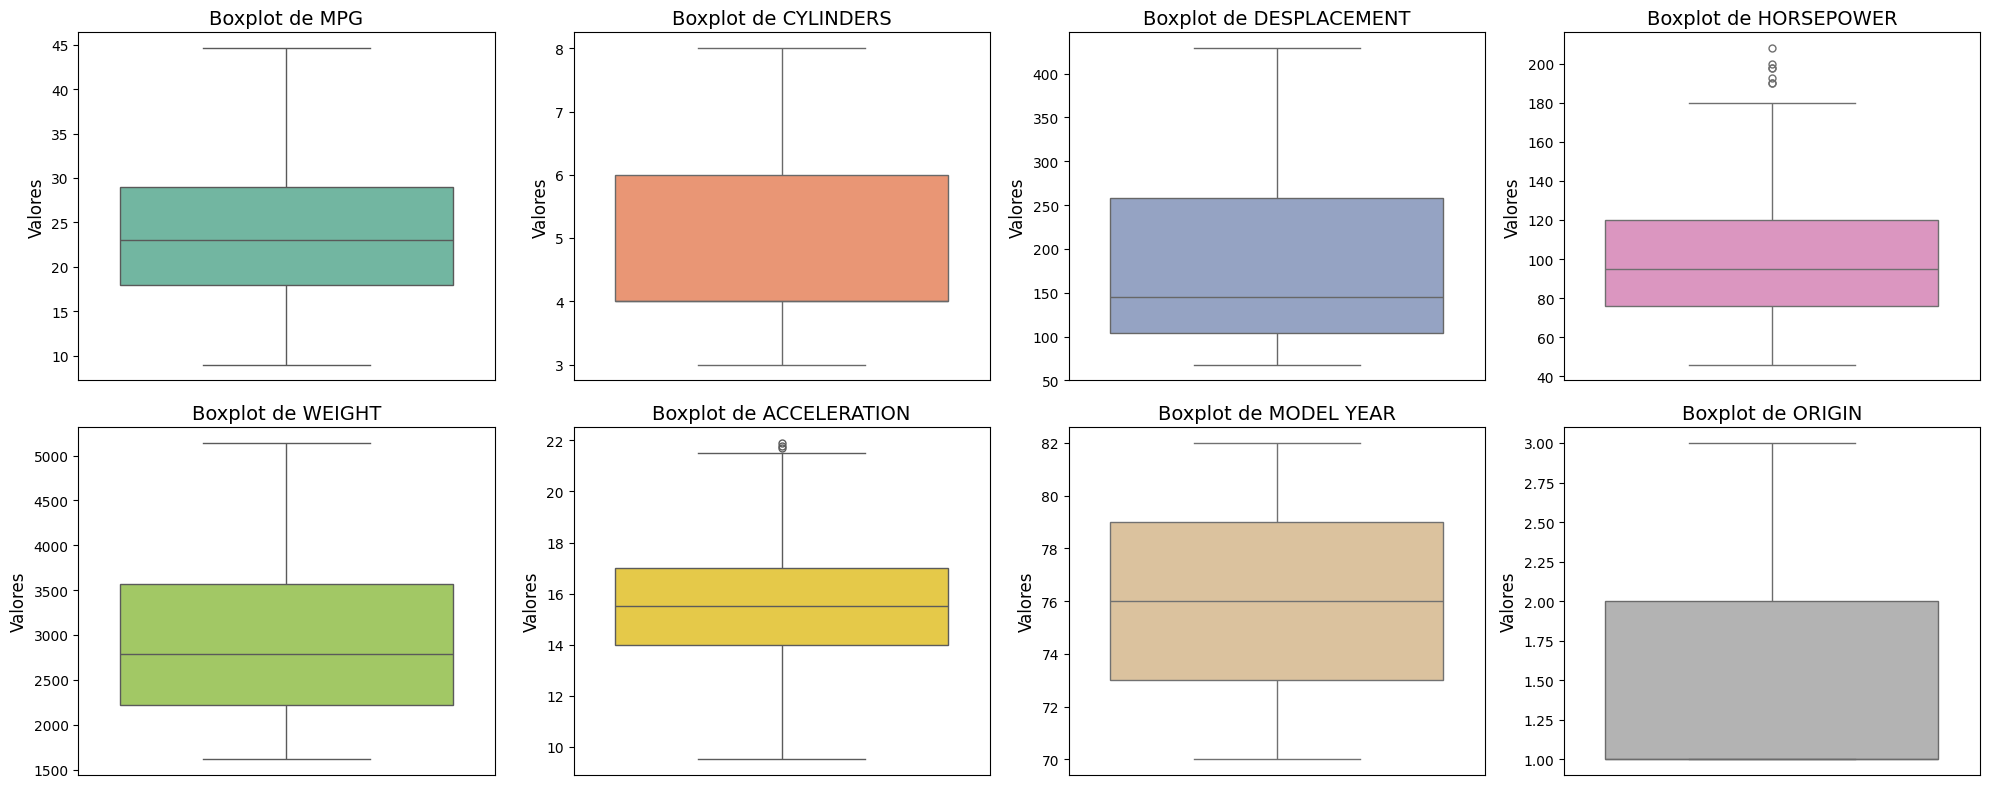

In [6]:
#Filtrar las columnas numericas
df_numerico = df.select_dtypes(include='number')

#Configurar tamano de los graficos
num_vars = len(df_numerico.columns)
cols = 4
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(20, rows * 4))

#Usar una paleta de colores
paleta = sns.color_palette("Set2", num_vars)

#Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df_numerico[columna], color=paleta[i-1], fliersize=5)
    plt.title(f'Boxplot de {columna}', fontsize=14)
    plt.ylabel('Valores', fontsize=12)
    plt.xticks([])

#Ajusto espacio y muestro grafico
plt.tight_layout()
plt.show()

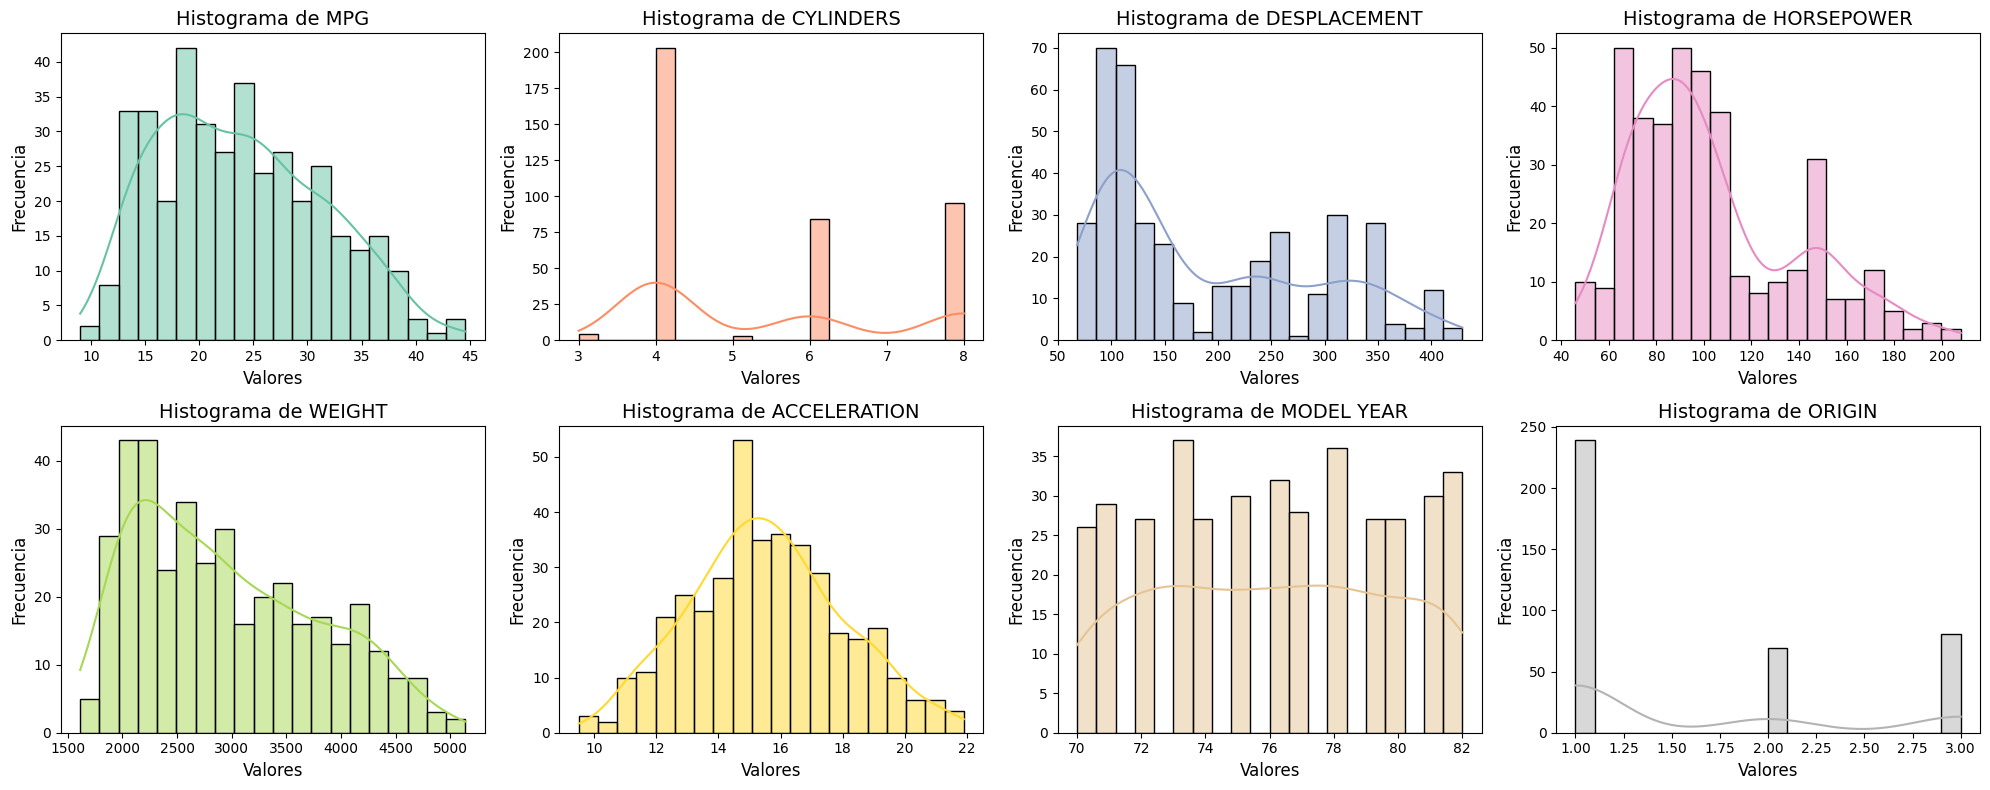

In [7]:
#Filtrar las columnas numericas
df_numerico = df.select_dtypes(include='number')

#Configurar tamano de los graficos
num_vars = len(df_numerico.columns)
cols = 4
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(20, rows * 4))

#Usar una paleta de colores
paleta = sns.color_palette("Set2", num_vars)

#Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_numerico[columna].dropna(), kde=True, color=paleta[i-1], bins=20)
    plt.title(f'Histograma de {columna}', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

#Ajusto espacio y muestro grafico
plt.tight_layout()
plt.show()

Reduccion de caracteristicas

In [8]:
df.dtypes

MPG             float64
CYLINDERS         int64
DESPLACEMENT    float64
HORSEPOWER      float64
WEIGHT            int64
ACCELERATION    float64
MODEL YEAR        int64
ORIGIN            int64
CAR NAME         object
dtype: object

In [9]:
df.columns

Index(['MPG', 'CYLINDERS', 'DESPLACEMENT', 'HORSEPOWER', 'WEIGHT',
       'ACCELERATION', 'MODEL YEAR', 'ORIGIN', 'CAR NAME'],
      dtype='object')

In [10]:
dfMat = df.loc[:,['MPG', 'CYLINDERS', 'DESPLACEMENT', 'HORSEPOWER', 'WEIGHT','ACCELERATION', 'MODEL YEAR', 'ORIGIN']]
dfMat.columns

Index(['MPG', 'CYLINDERS', 'DESPLACEMENT', 'HORSEPOWER', 'WEIGHT',
       'ACCELERATION', 'MODEL YEAR', 'ORIGIN'],
      dtype='object')

In [11]:
correlacion = dfMat.corr(method = 'pearson')
correlacion.style.background_gradient(cmap='coolwarm')

,MPG,CYLINDERS,DESPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN
MPG,1.000000,-0.762152,-0.794552,-0.767314,-0.828215,0.355166,0.548478,0.563672
CYLINDERS,-0.762152,1.000000,0.956416,0.851860,0.895801,-0.495296,-0.327266,-0.563010
DESPLACEMENT,-0.794552,0.956416,1.000000,0.886811,0.939041,-0.511102,-0.339440,-0.621386
HORSEPOWER,-0.767314,0.851860,0.886811,1.000000,0.878883,-0.656977,-0.369925,-0.468959
WEIGHT,-0.828215,0.895801,0.939041,0.878883,1.000000,-0.397315,-0.288992,-0.588920
ACCELERATION,0.355166,-0.495296,-0.511102,-0.656977,-0.397315,1.000000,0.233646,0.199191
MODEL YEAR,0.548478,-0.327266,-0.339440,-0.369925,-0.288992,0.233646,1.000000,0.178201
ORIGIN,0.563672,-0.563010,-0.621386,-0.468959,-0.588920,0.199191,0.178201,1.000000


In [12]:
dfMat = df.loc[:,['MPG', 'DESPLACEMENT', 'HORSEPOWER', 'WEIGHT','ACCELERATION', 'MODEL YEAR', 'ORIGIN']]
correlacion = dfMat.corr(method = 'pearson')
correlacion.style.background_gradient(cmap='coolwarm')

,MPG,DESPLACEMENT,HORSEPOWER,WEIGHT,ACCELERATION,MODEL YEAR,ORIGIN
MPG,1.000000,-0.794552,-0.767314,-0.828215,0.355166,0.548478,0.563672
DESPLACEMENT,-0.794552,1.000000,0.886811,0.939041,-0.511102,-0.339440,-0.621386
HORSEPOWER,-0.767314,0.886811,1.000000,0.878883,-0.656977,-0.369925,-0.468959
WEIGHT,-0.828215,0.939041,0.878883,1.000000,-0.397315,-0.288992,-0.588920
ACCELERATION,0.355166,-0.511102,-0.656977,-0.397315,1.000000,0.233646,0.199191
MODEL YEAR,0.548478,-0.339440,-0.369925,-0.288992,0.233646,1.000000,0.178201
ORIGIN,0.563672,-0.621386,-0.468959,-0.588920,0.199191,0.178201,1.000000


In [13]:
dfMat = df.loc[:,['MPG', 'WEIGHT', 'HORSEPOWER', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN']]
correlacion = dfMat.corr(method = 'pearson')
correlacion.style.background_gradient(cmap='coolwarm')

,MPG,WEIGHT,HORSEPOWER,ACCELERATION,MODEL YEAR,ORIGIN
MPG,1.000000,-0.828215,-0.767314,0.355166,0.548478,0.563672
WEIGHT,-0.828215,1.000000,0.878883,-0.397315,-0.288992,-0.588920
HORSEPOWER,-0.767314,0.878883,1.000000,-0.656977,-0.369925,-0.468959
ACCELERATION,0.355166,-0.397315,-0.656977,1.000000,0.233646,0.199191
MODEL YEAR,0.548478,-0.288992,-0.369925,0.233646,1.000000,0.178201
ORIGIN,0.563672,-0.588920,-0.468959,0.199191,0.178201,1.000000


In [14]:
dfMat = df.loc[:,['MPG',  'HORSEPOWER', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN']]
correlacion = dfMat.corr(method = 'pearson')
correlacion.style.background_gradient(cmap='coolwarm')

,MPG,HORSEPOWER,ACCELERATION,MODEL YEAR,ORIGIN
MPG,1.000000,-0.767314,0.355166,0.548478,0.563672
HORSEPOWER,-0.767314,1.000000,-0.656977,-0.369925,-0.468959
ACCELERATION,0.355166,-0.656977,1.000000,0.233646,0.199191
MODEL YEAR,0.548478,-0.369925,0.233646,1.000000,0.178201
ORIGIN,0.563672,-0.468959,0.199191,0.178201,1.000000


In [15]:
dfMat.head(6)

,MPG,HORSEPOWER,ACCELERATION,MODEL YEAR,ORIGIN
0,18.0,130.0,12.0,70,1
1,15.0,165.0,11.5,70,1
2,18.0,150.0,11.0,70,1
3,16.0,150.0,12.0,70,1
4,17.0,140.0,10.5,70,1
5,15.0,198.0,10.0,70,1


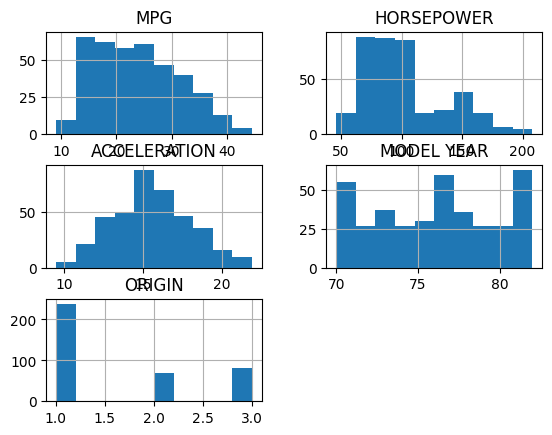

In [16]:
viz = dfMat[['MPG', 'HORSEPOWER', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN']]
viz.hist()
plt.show()

In [17]:
msk = np.random.rand(len(dfMat)) < 0.8
train = dfMat[msk]
test = dfMat[~msk]

In [18]:
train.head(5)

,MPG,HORSEPOWER,ACCELERATION,MODEL YEAR,ORIGIN
0,18.0,130.0,12.0,70,1
1,15.0,165.0,11.5,70,1
2,18.0,150.0,11.0,70,1
3,16.0,150.0,12.0,70,1
4,17.0,140.0,10.5,70,1


In [19]:
test.head(5)

,MPG,HORSEPOWER,ACCELERATION,MODEL YEAR,ORIGIN
20,24.0,95.0,15.0,70,3
27,24.0,90.0,14.5,70,2
39,23.6,48.0,20.0,71,2
41,16.0,105.0,15.5,71,1
49,12.0,180.0,11.5,71,1


In [20]:
regr = linear_model.LinearRegression()
#x = np.asanyarray(train[['HORSEPOWER', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN']]) # MULTIPLE
x = np.asanyarray(train[['HORSEPOWER']]) # SIMPLE
y = np.asanyarray(train[['MPG']])

regr.fit(x,y)

print('Coeficientes:', regr.coef_)

Coeficientes: [[-0.16741567]]


In [21]:
#y_hat = regr.predict(test[['HORSEPOWER', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN']])
#x = np.asanyarray(test[['HORSEPOWER', 'ACCELERATION', 'MODEL YEAR', 'ORIGIN']]) # MULTIPLE
y_hat = regr.predict(test[['HORSEPOWER']])
x = np.asanyarray(test[['HORSEPOWER']]) # SIMPLE
y = np.asanyarray(test[['MPG']])

print('Error Residual Medio (RSE): %.2f' % np.mean((y_hat - y)**2))
print('Confianza: %.2f' % regr.score(x,y))

Error Residual Medio (RSE): 23.94
Confianza: 0.56


/opt/anaconda3/envs/Python312/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [22]:
df = pd.DataFrame({'Valor Actual': y.flatten(), 'Prediccion': y_hat.flatten()})
df.head(10)

,Valor Actual,Prediccion
0,24.0,24.974647
1,24.0,25.811725
2,23.6,32.843184
3,16.0,23.300490
4,12.0,10.744315
5,28.0,25.811725
6,30.0,29.160039
7,30.0,28.155545
8,24.0,24.974647
9,25.0,27.485882


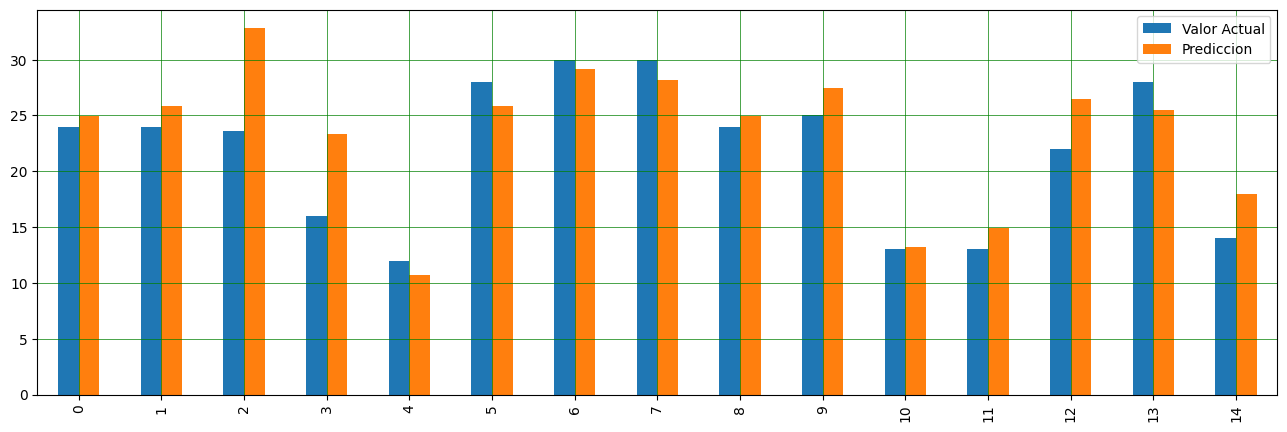

In [23]:
df1 = df.head(15)
df1.plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()